codes à faire tourner pour installer R à chaque fois:

dans un terminal R:
install.packages('IRkernel')

puis dans le terminal normal: pip install jupyter

puis re dans terminal R:
IRkernel::installspec(user = TRUE)

A mettre en annexe:

le choix du format: le choix d'un format ts plutôt que zoo..

Préparation base

In [3]:
# ***************************************************************************
# ******************** Projet de séries temporelles 2025 ********************
# ***************************************************************************

# Auteurs : Diane Sainteny et Marie Maignant 

rm(list=ls(all=TRUE))

#Chargement des packages 
install.packages("urca")
install.packages('lmtest')
install.packages('readr')
install.packages('zoo')
install.packages('fUnitRoots')
install.packages('tseries')
install.packages('forecast')
install.packages('ellipse')
install.packages('ggplot2')
install.packages('ggcorrplot')
install.packages('astsa')
install.packages('portes')
install.packages('tsoutliers')
install.packages('expsmooth')

#Chargement des packages 
library(urca)
library(lmtest)
library(readr)
library(zoo)
library(fUnitRoots)
library(tseries)
library(forecast)
library(ellipse)
library(ggplot2)
library(ggcorrplot)
library(astsa)
library(portes)
library(tsoutliers)
library(expsmooth)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘zoo’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bit’, ‘bit64’, ‘tidyselect’, ‘progress’, ‘hms’, ‘vroom’, ‘tzdb’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘timeDate’, ‘gss’, ‘stabledist’, ‘timeSeries’, ‘fBasics’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘farver’, ‘labeling’, ‘RColorBrewer’, ‘viridisLite’, ‘gtable’, ‘isoband’, ‘scales’,

In [31]:
# chargement de packages
install.packages("zoo")
install.packages("tseries")
# install.packages("forecast")
install.packages("ggplot2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [32]:
library(zoo)
library(tseries)
# library(forecast)
library(ggplot2)

In [4]:
# Chargement et nettoyage de la base

data <- read.csv("/home/onyxia/work/Series_temporelles/valeurs_mensuelles.csv", header = FALSE, sep = ";")
base <- data[,c(1:2)]
colnames(base) <- c("Période","Indice de production de jus de fruits")
View(base)

Période,Indice de production de jus de fruits
<chr>,<dbl>
2025-02,90.30
2025-01,90.54
2024-12,96.84
2024-11,91.88
2024-10,82.97
2024-09,90.77
2024-08,87.57
2024-07,91.49
2024-06,91.34


In [5]:
# préparation de la série
xm.source <- zoo(data[[2]]) #converts the first data element en "zoo"
T <- length(xm.source)
xm <- xm.source[1:T]
xm_ts <- ts(xm, start = c(1990, 1), frequency = 12)

In [6]:
print(xm)

     1      2      3      4      5      6      7      8      9     10     11 
 90.30  90.54  96.84  91.88  82.97  90.77  87.57  91.49  91.34  97.57  99.35 
    12     13     14     15     16     17     18     19     20     21     22 
 99.15 100.01 102.66 100.87 103.31 103.54 101.33 109.69 100.06 104.87 101.77 
    23     24     25     26     27     28     29     30     31     32     33 
 99.85 102.82 102.28 101.86 104.09 108.39 110.02 114.86 110.56 110.57 108.72 
    34     35     36     37     38     39     40     41     42     43     44 
100.90 105.59 107.08 108.69 105.03 103.89 102.52 107.54 100.83 101.52 101.43 
    45     46     47     48     49     50     51     52     53     54     55 
 96.94  95.65  97.00 102.40  94.18  96.10 102.05 122.79 122.90 132.80 115.79 
    56     57     58     59     60     61     62     63     64     65     66 
115.10 113.88 112.51 113.80 112.52 120.30 116.50 113.91 111.78 114.57 112.62 
    67     68     69     70     71     72     73     74     75  

In [7]:
print(xm_ts)

        Jan    Feb    Mar    Apr    May    Jun    Jul    Aug    Sep    Oct
1990  90.30  90.54  96.84  91.88  82.97  90.77  87.57  91.49  91.34  97.57
1991 100.01 102.66 100.87 103.31 103.54 101.33 109.69 100.06 104.87 101.77
1992 102.28 101.86 104.09 108.39 110.02 114.86 110.56 110.57 108.72 100.90
1993 108.69 105.03 103.89 102.52 107.54 100.83 101.52 101.43  96.94  95.65
1994  94.18  96.10 102.05 122.79 122.90 132.80 115.79 115.10 113.88 112.51
1995 120.30 116.50 113.91 111.78 114.57 112.62 115.49 118.11 121.60 123.86
1996 121.70 124.96 122.80 121.33 127.90 123.33 119.82 119.25 111.54 126.37
1997 119.08 126.90 123.98 126.73 126.25 130.26 131.52 130.31 130.96 125.19
1998 133.12 128.83 132.50 135.18 136.18 137.26 136.14 136.26 118.83 129.45
1999 124.76 124.57 128.20 119.20 115.65 124.12 127.31 124.60 135.66 132.39
2000 132.79 138.66 137.43 146.59 135.94 133.20 127.99 134.19 136.43 132.57
2001 132.13 129.22 125.06 129.85 124.03 122.45 127.65 128.00 124.78 130.49
2002 125.89 124.19 117.62

PARTIE 1

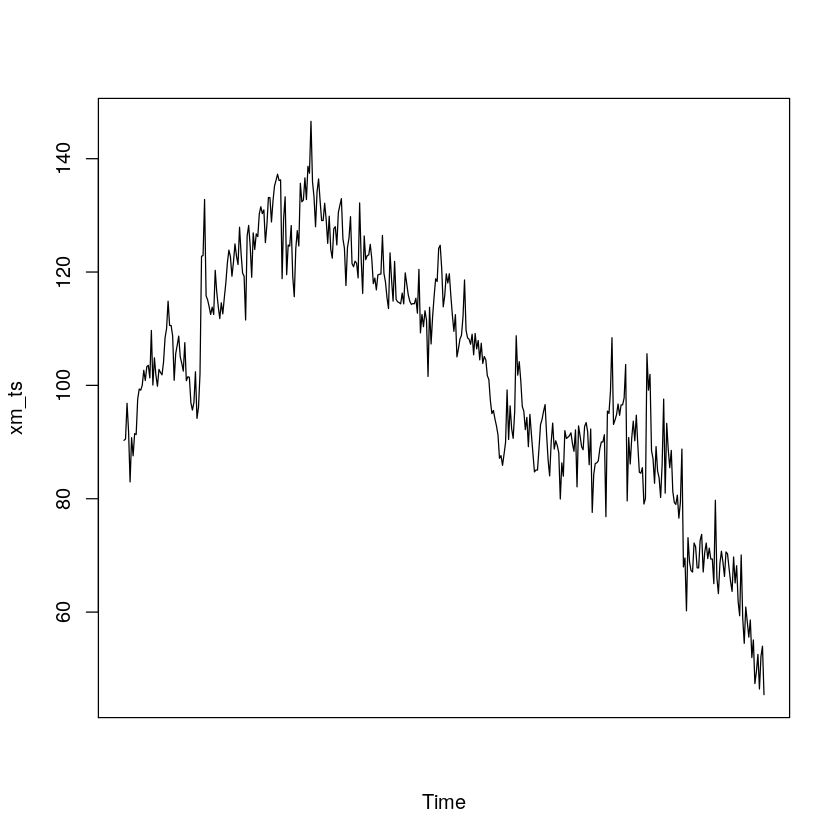

In [8]:
# Part 1

# question 1
plot(xm_ts, xaxt="n") #represents xm_ts
axis(side=1,at=seq(0,422,12)) #prints the x-axis in 12 by 0 to 422

faudra écrire interprétation.. à faire dans le rapport.
Description:
- Un indice chiffré par mois (ex : janvier 2019 à mars 2025) représentant le niveau de production dans le secteur Préparation de jus de fruits et légumes (code NAF 10.32).
- Base 100 en 2021 : cela signifie que l’année 2021 est le point de référence (indice = 100 en moyenne cette année-là).

Ne pas oublier d'indiquer la source, la régularité des données observées et de quand à quand elles le sont

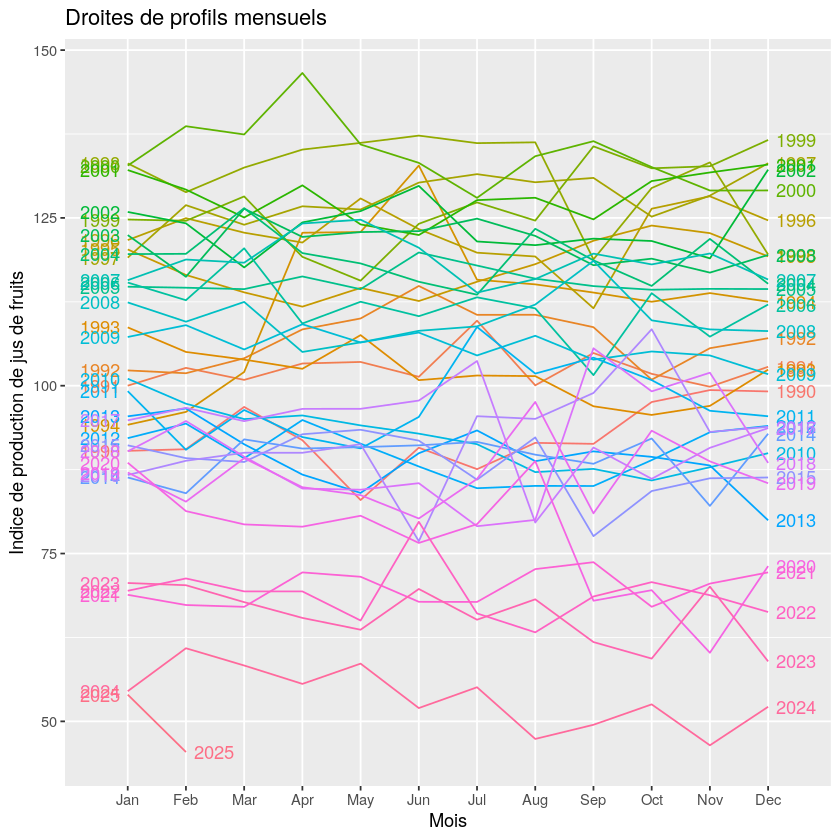

In [34]:
# observations: on regarde s'il y a une forme de saisonnalité 
# ( il ne devrait pas y en avoir car la série devrait avoir été désaisonnée)

ggseasonplot(xm_ts, year.labels=TRUE, year.labels.left=TRUE) +
  ylab("Indice de production de jus de fruits") +
  xlab("Mois") +
  ggtitle("Droites de profils mensuels")

Manifestement pas de saisonnalité. Mettre en annexe ?

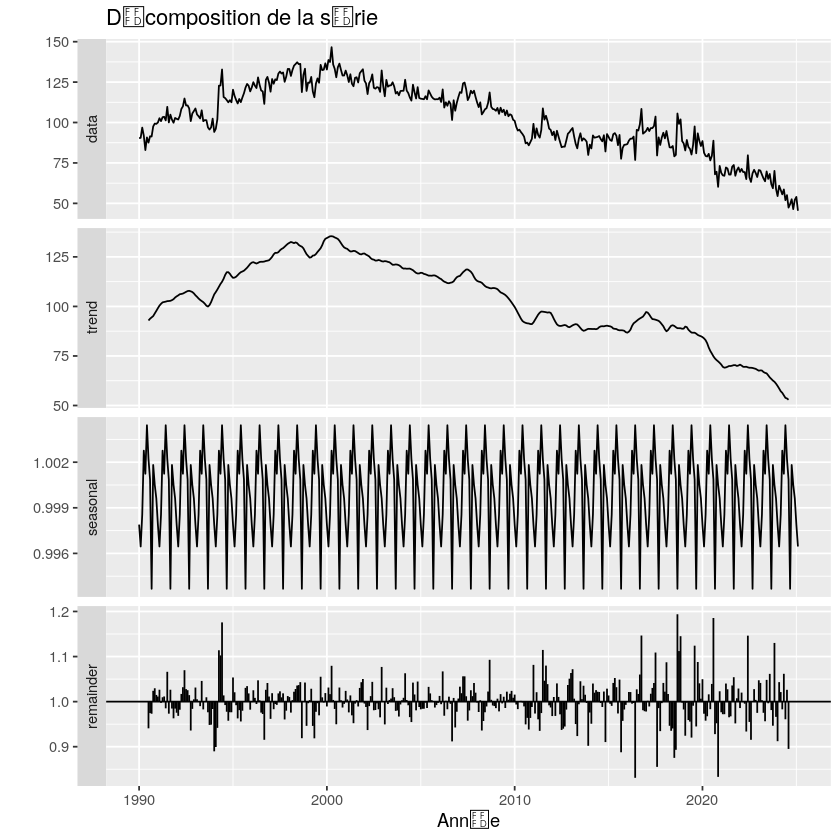

In [9]:
# Question 2

# tout d'abord, analysons la trend
xm_trend <- decompose(xm_ts,type="multiplicative")
autoplot(xm_trend, main = "D�composition de la s�rie", xlab ="Ann�e")

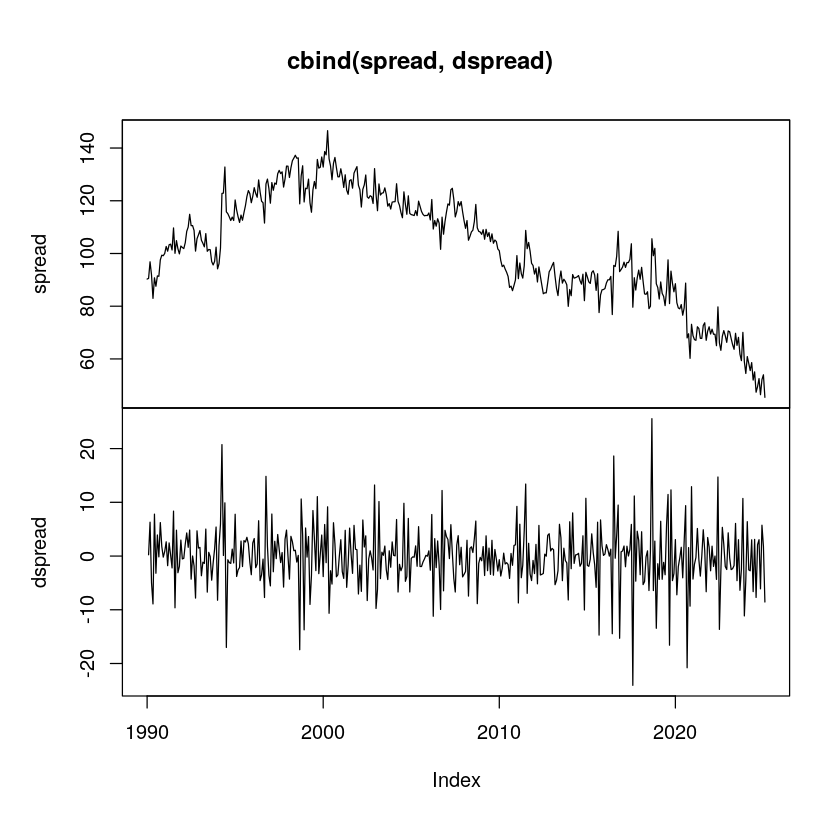

In [10]:
# première différenciation. La série semble déjà maintenant stationnaire..

dates <- as.yearmon(seq(from=1990,to=2025+1/12,by=1/12)) #index des dates pour spread
spread <- zoo(xm,order.by=dates)
dspread <- diff(spread,1) #diff ́erence premi`ere
plot(cbind(spread,dspread))

In [ ]:
# je sais pas si je vais garder ça.. a voir
# on choisit de garder que les valeurs à partir de 2000 pour avoir une tendance linéaire
index(xm) <- as.yearmon(seq(from=1990,to=2025+1/12,by=1/12))
xm_2000 <- xm[index(xm) >= as.yearmon("2000-01")]

In [43]:
print(xm_2000)

Jan 2000 Feb 2000 Mar 2000 Apr 2000 May 2000 Jun 2000 Jul 2000 Aug 2000 
  132.79   138.66   137.43   146.59   135.94   133.20   127.99   134.19 
Sep 2000 Oct 2000 Nov 2000 Dec 2000 Jan 2001 Feb 2001 Mar 2001 Apr 2001 
  136.43   132.57   129.08   129.09   132.13   129.22   125.06   129.85 
May 2001 Jun 2001 Jul 2001 Aug 2001 Sep 2001 Oct 2001 Nov 2001 Dec 2001 
  124.03   122.45   127.65   128.00   124.78   130.49   131.77   132.95 
Jan 2002 Feb 2002 Mar 2002 Apr 2002 May 2002 Jun 2002 Jul 2002 Aug 2002 
  125.89   124.19   117.62   124.33   126.01   129.77   121.49   120.94 
Sep 2002 Oct 2002 Nov 2002 Dec 2002 Jan 2003 Feb 2003 Mar 2003 Apr 2003 
  121.91   121.56   118.97   132.19   122.44   116.23   126.37   122.17 
May 2003 Jun 2003 Jul 2003 Aug 2003 Sep 2003 Oct 2003 Nov 2003 Dec 2003 
  122.89   123.03   124.89   122.32   117.95   118.93   116.85   119.48 
Jan 2004 Feb 2004 Mar 2004 Apr 2004 May 2004 Jun 2004 Jul 2004 Aug 2004 
  119.61   119.65   126.45   119.76   118.22   115.

Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


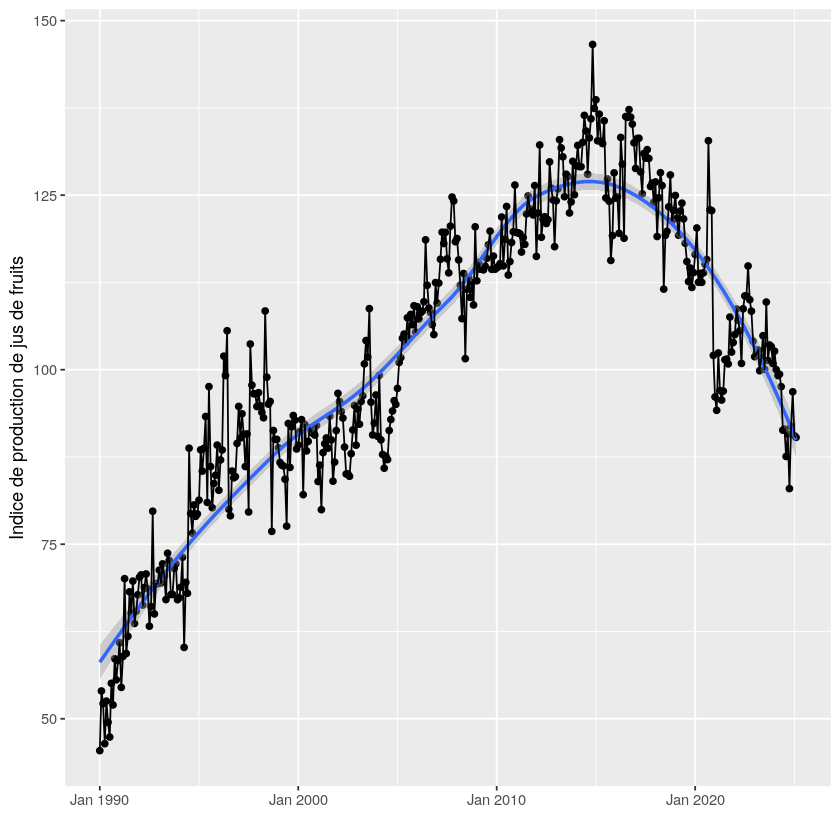

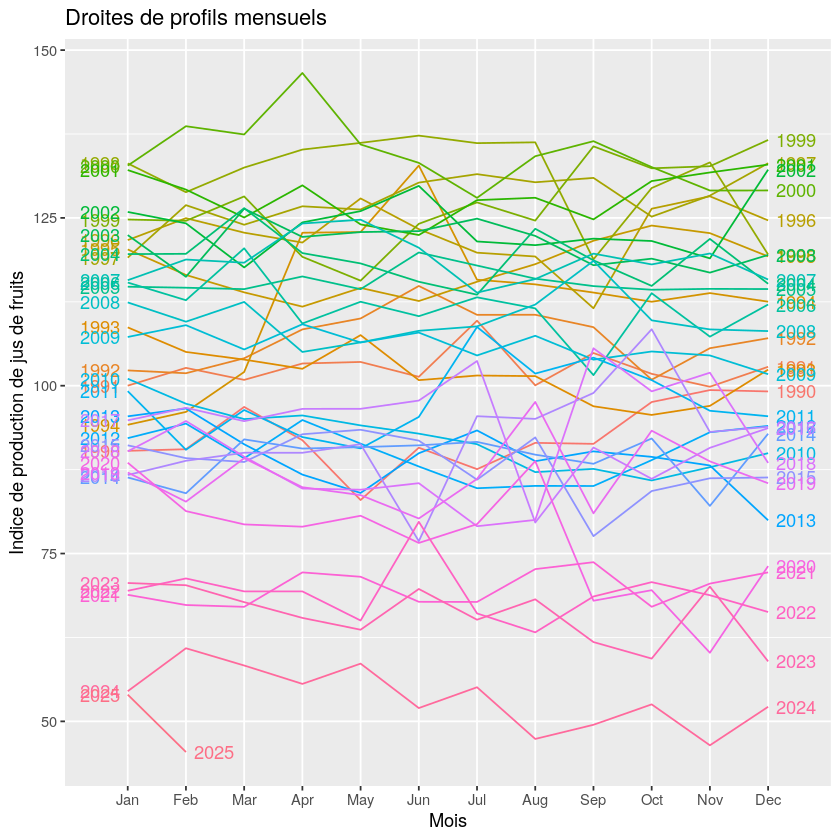

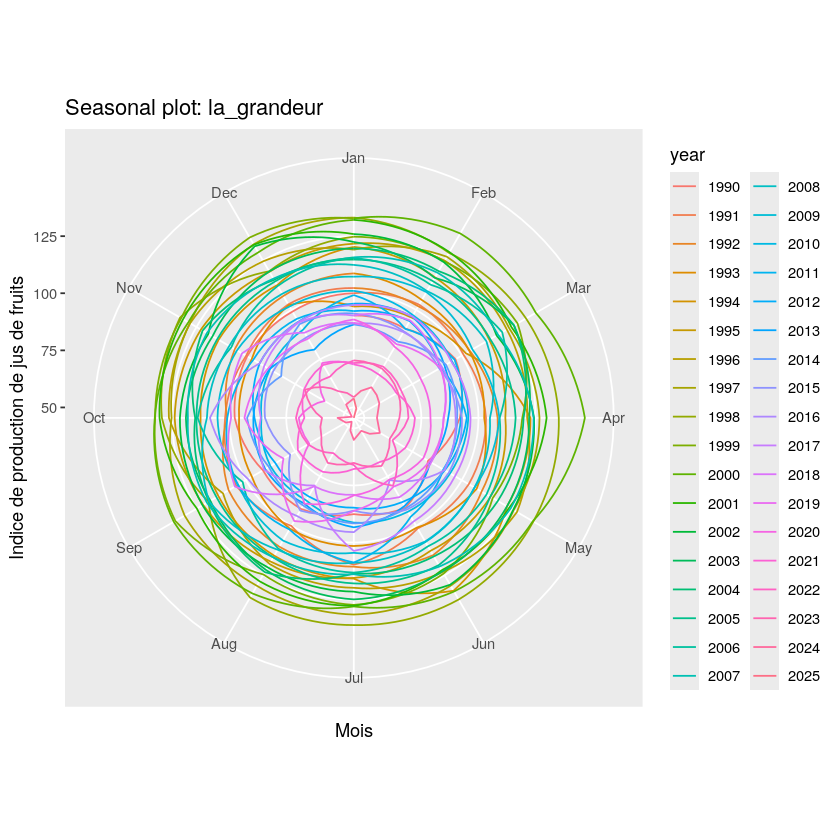

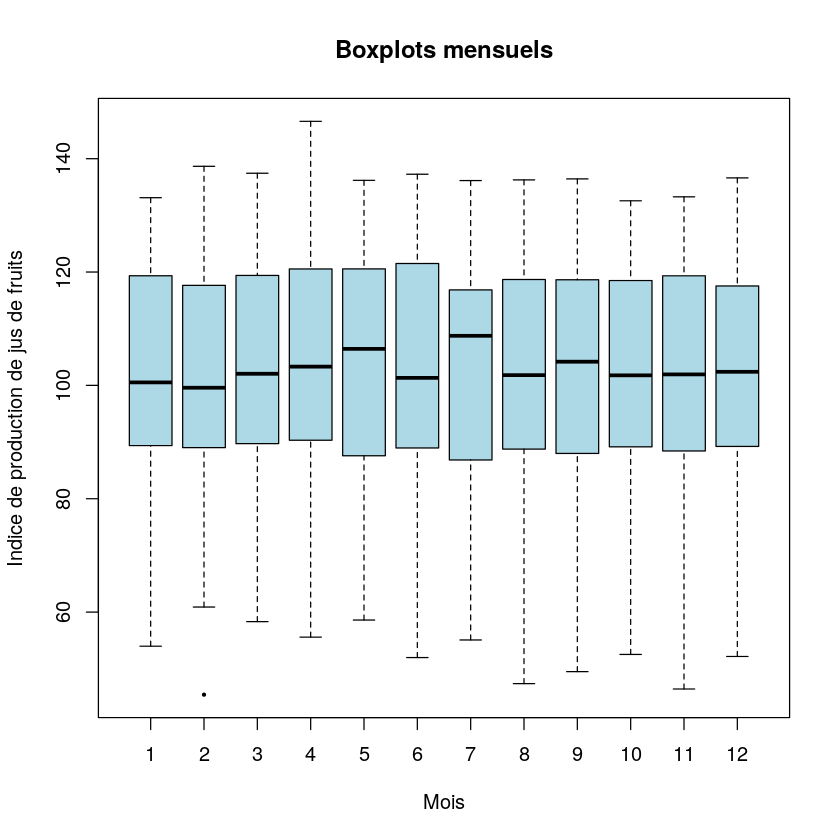

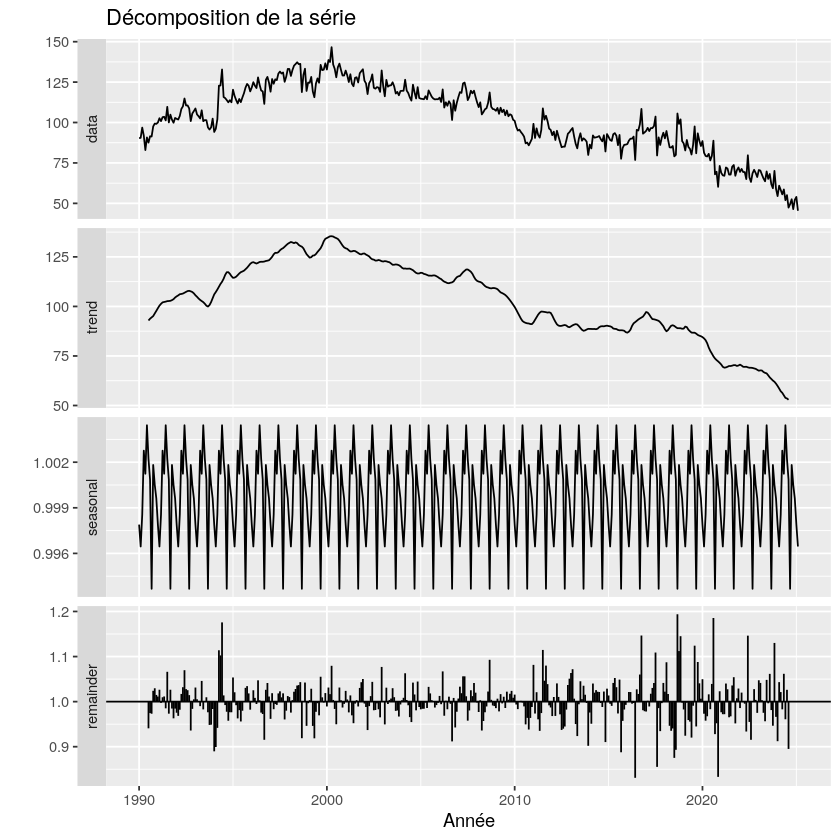

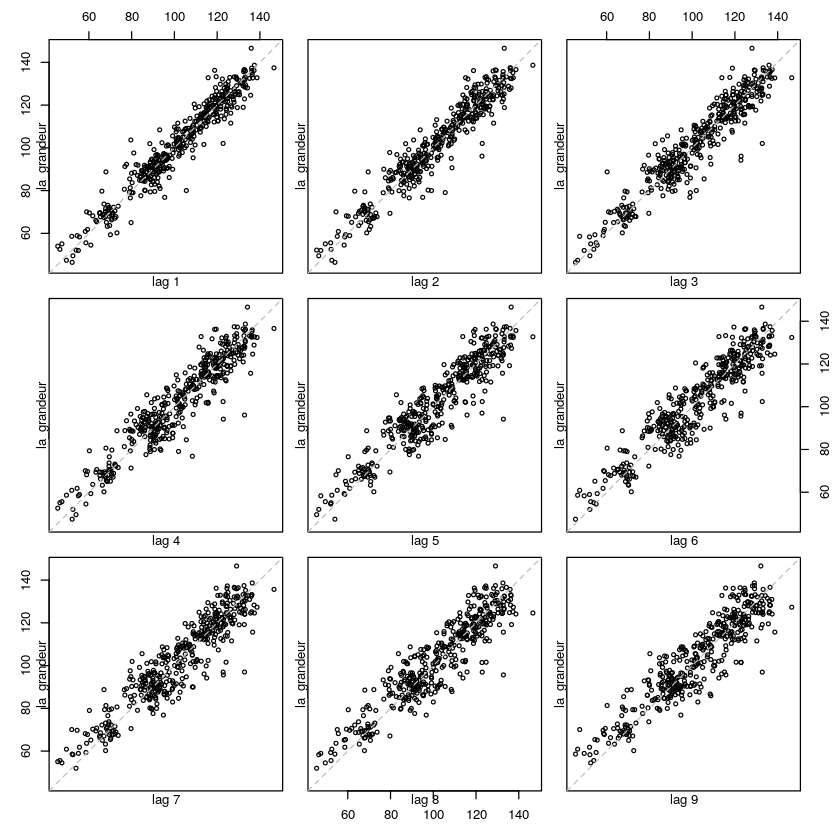

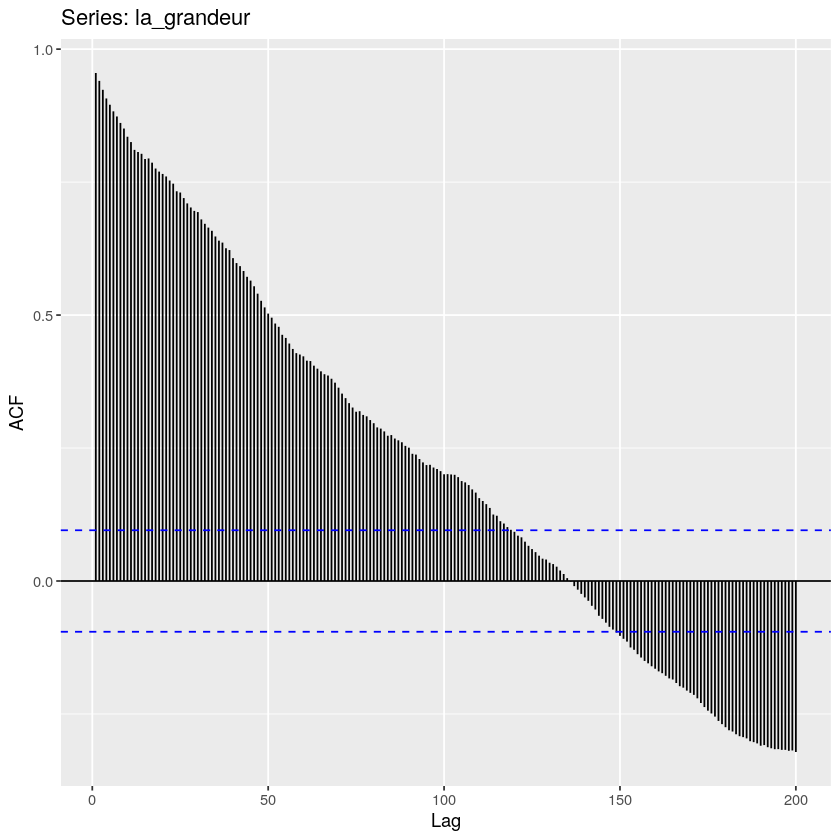

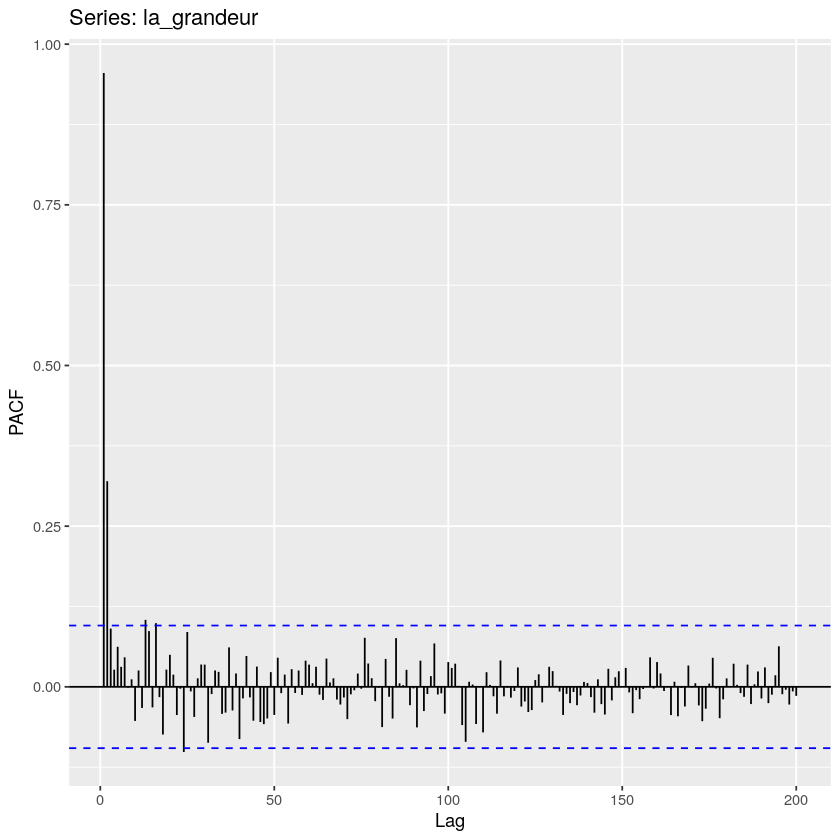

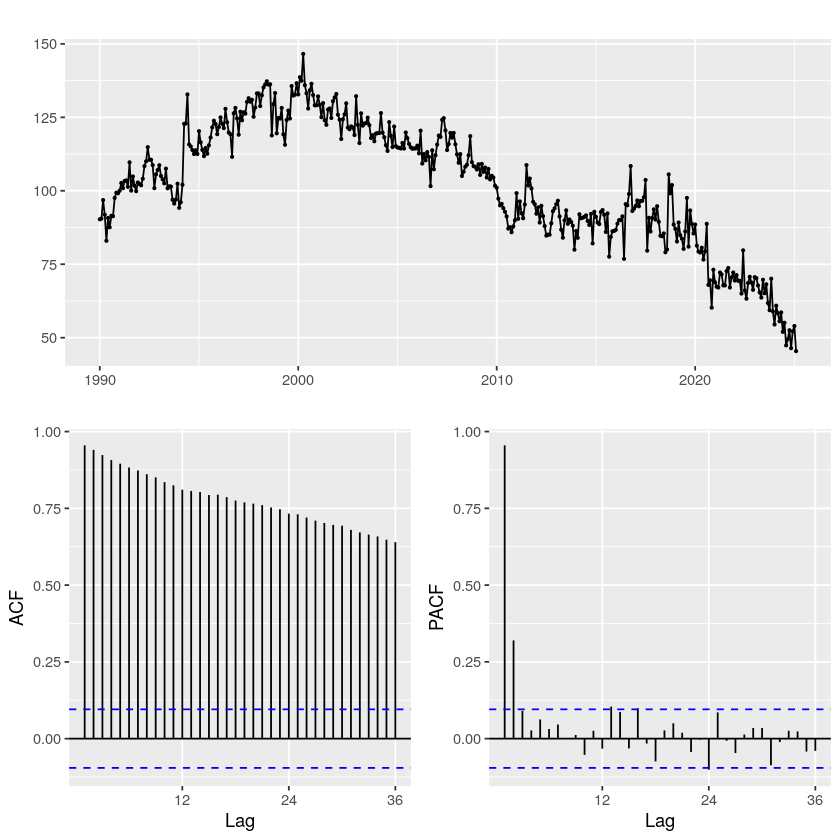

In [30]:


# **************************************************************************#
#                                                                           #
#                                                                           #
#                         PARTIE I : Les données                            #
#                                                                           #
#                                                                           #
# **************************************************************************#

# ========================================================================= #
# ============================= Question 1 ================================ #
# ========================================================================= #


# Création d'une série temporelle à partir des IPI
la_grandeur <- ts(as.numeric(base[[2]]), start = 1990, frequency = 12)
la_grandeur <- window(la_grandeur, end=c(2025,2))

# Visualisation

## Série temporelle (Figure 1)
qplot(y=la_grandeur, x =as.yearmon(base[[1]]), geom = c("point","smooth","line"), xlab = "", ylab = "Indice de production de jus de fruits")

# Analyses et graphiques annexes

# Saisonnalité (Figure 7):

## Saisonnalité à l'aide des droites de profil (Season plot)
ggseasonplot(la_grandeur, year.labels=TRUE, year.labels.left=TRUE) +
  ylab("Indice de production de jus de fruits") +
  xlab("Mois") +
  ggtitle("Droites de profils mensuels")

## Season plot en coordonnées polaires
ggseasonplot(la_grandeur, polar=TRUE) + ylab("Indice de production de jus de fruits")+ xlab("Mois")

#On ne remarque aucun changement particulier dans l'évolution de la série selon le mois.

# Boxplots mensuels (Figure 8)
## Les Boxplots mensuels permettent aussi de vérifier la saisonnalité
boxplot(la_grandeur~cycle(la_grandeur),col="lightblue",pch=20,cex=0.5, main = "Boxplots mensuels", ylab = "Indice de production de jus de fruits", xlab = "Mois")

#Les 12 Boxplots sont similaires, aucun mois ne se démarque des autres.

# Tendance: 

## Décomposition de la série temporelle afin d'analyser le trend
la_grandeur_dec <- decompose(la_grandeur,type="multiplicative")
autoplot(la_grandeur_dec, main = "Décomposition de la série", xlab ="Année")


# Etude de l'autocorrélation de la série d'origine:

## Scatter plot des autocorrélations
lag.plot(la_grandeur, lags = 9, do.lines = FALSE)

## ACF : fonction d'autocorrélation
ggAcf(la_grandeur, lag.max=200, plot=T)

## PACF : fonction d'autocorrélation partielle
ggPacf(la_grandeur,lag.max=200, plot=T)

## Récapitulatif
ggtsdisplay(la_grandeur)

In [32]:
la_grandeur_i <- window(la_grandeur, start = c(2000, 1))

In [40]:
# ========================================================================= #
# =============================== Question 2 ============================== #
# ========================================================================= #

# Avant de continuer, centrons la série pour annuler l'effet de l'ordonnée à l'origine

la_grandeur_c <- la_grandeur - mean(la_grandeur)

## Tests de stationnarité de la série de base

## Test de Dickey-Fuller Augmenté
adf <- adf.test(la_grandeur_c)
adf

## Test de Phillips Perron
pp.test(la_grandeur_c) 

## Test de KPSS
kpss.test(la_grandeur_c, null = "Trend") 
kpss.test(la_grandeur_c) 

## On observe une série non stationnaire selon ADF et  KPSS.


	Augmented Dickey-Fuller Test

data:  la_grandeur_c
Dickey-Fuller = -2.4569, Lag order = 7, p-value = 0.3844
alternative hypothesis: stationary



	Phillips-Perron Unit Root Test

data:  la_grandeur_c
Dickey-Fuller Z(alpha) = -19.531, Truncation lag parameter = 5, p-value
= 0.07829
alternative hypothesis: stationary


Warning message in kpss.test(la_grandeur_c, null = "Trend"):
“p-value smaller than printed p-value”



	KPSS Test for Trend Stationarity

data:  la_grandeur_c
KPSS Trend = 1.1508, Truncation lag parameter = 5, p-value = 0.01


Warning message in kpss.test(la_grandeur_c):
“p-value smaller than printed p-value”



	KPSS Test for Level Stationarity

data:  la_grandeur_c
KPSS Level = 4.8147, Truncation lag parameter = 5, p-value = 0.01


Warning message in adf.test(d_la_grandeur):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  d_la_grandeur
Dickey-Fuller = -9.8585, Lag order = 7, p-value = 0.01
alternative hypothesis: stationary


Warning message in pp.test(d_la_grandeur):
“p-value smaller than printed p-value”



	Phillips-Perron Unit Root Test

data:  d_la_grandeur
Dickey-Fuller Z(alpha) = -503.7, Truncation lag parameter = 5, p-value
= 0.01
alternative hypothesis: stationary


Warning message in kpss.test(d_la_grandeur):
“p-value greater than printed p-value”



	KPSS Test for Level Stationarity

data:  d_la_grandeur
KPSS Level = 0.30956, Truncation lag parameter = 5, p-value = 0.1


Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.


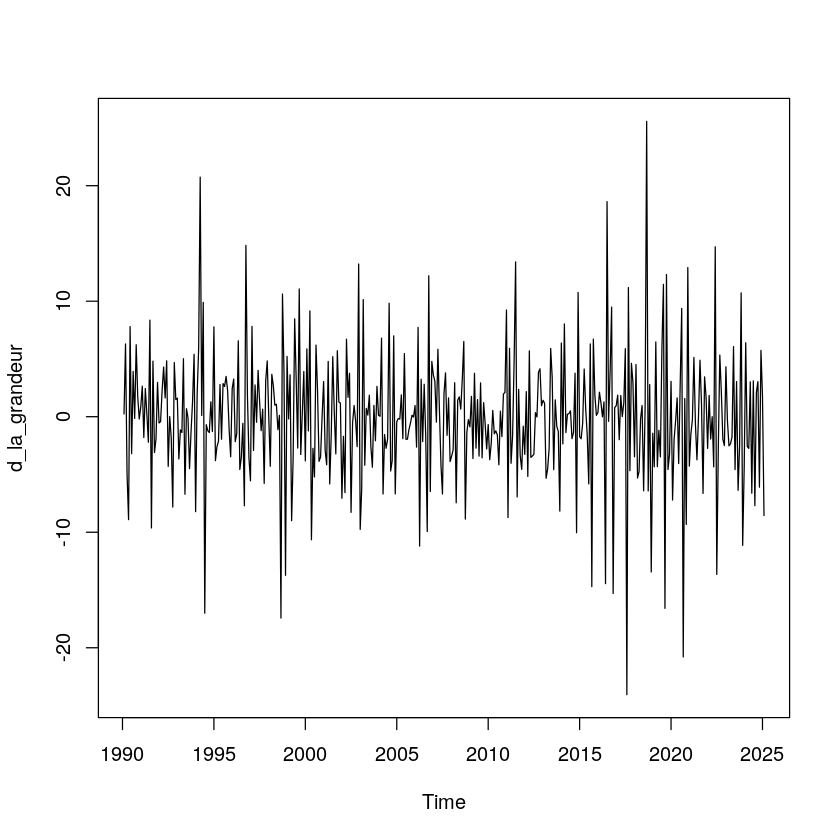

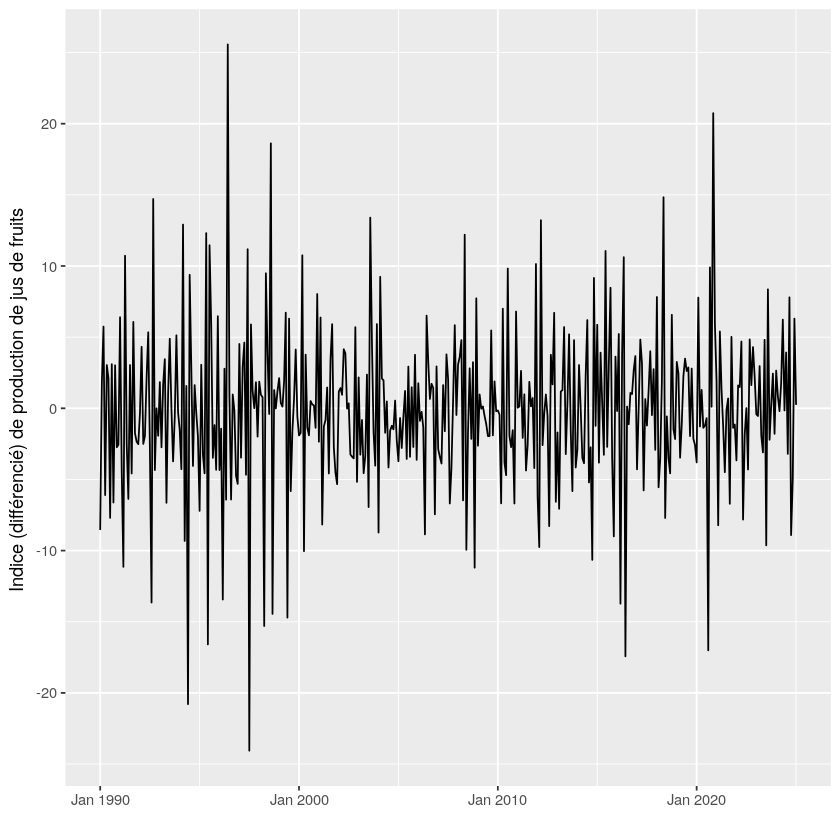

In [41]:
# Construisons la série différenciée pour voir si elle est stationnaire
d_la_grandeur = diff(la_grandeur)
plot(d_la_grandeur)

# Tests de stationnarité de la série différenciée
## Test de Dickey-Fuller Augmenté
adf_sta <- adf.test(d_la_grandeur)
adf_sta

## Test de Phillips Perron
pp.test(d_la_grandeur) 

## Test de KPSS
kpss.test(d_la_grandeur) 

## Après différentiation, la série devient stationnaire
qplot(y=d_la_grandeur, x =as.yearmon(base[[1]])[-c(1)],geom = "line", xlab = "", ylab = "Indice (différencié) de production de jus de fruits ")


Warning message in plot.xy(xy, type, ...):
“plot type 'line' will be truncated to first character”
Warning message in plot.xy(xy, type, ...):
“plot type 'line' will be truncated to first character”


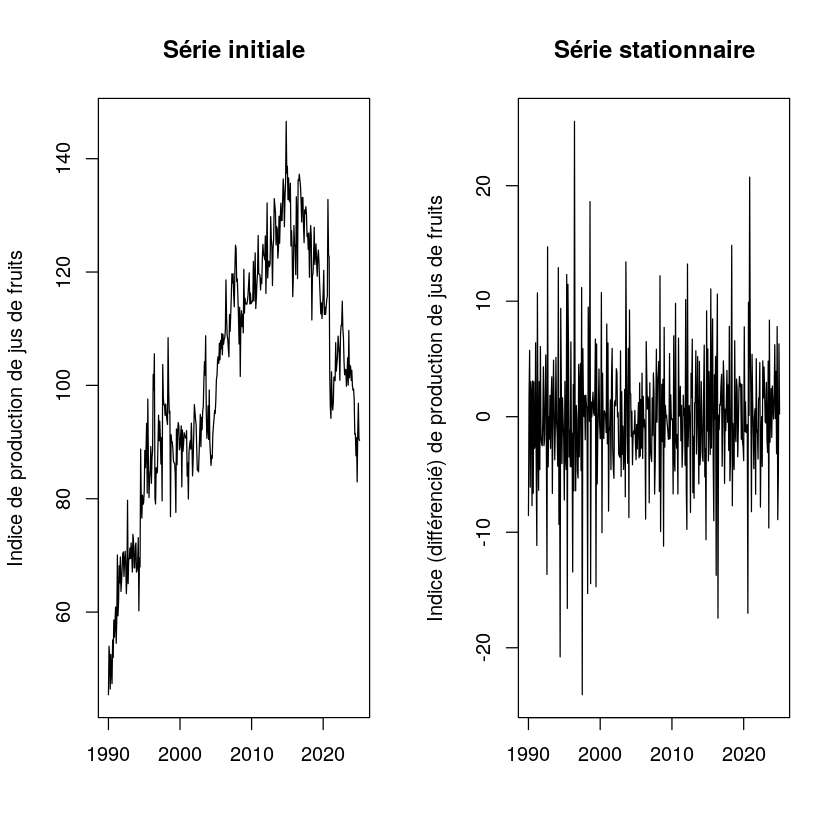

In [42]:
# ========================================================================= #
# =============================== Question 3 ============================== #
# ========================================================================= #

# Visualisation de la série initiale et de la série stationnarisée
par(mfrow=c(1,2))
plot(y=la_grandeur, x =as.yearmon(base[[1]]),type = "line", main="Série initiale", xlab = "", ylab = "Indice de production de jus de fruits")
plot(y=d_la_grandeur, x =as.yearmon(base[[1]])[-c(1)],type = "line", main="Série stationnaire", xlab = "", ylab = "Indice (différencié) de production de jus de fruits")
par(mfrow=c(1,1))

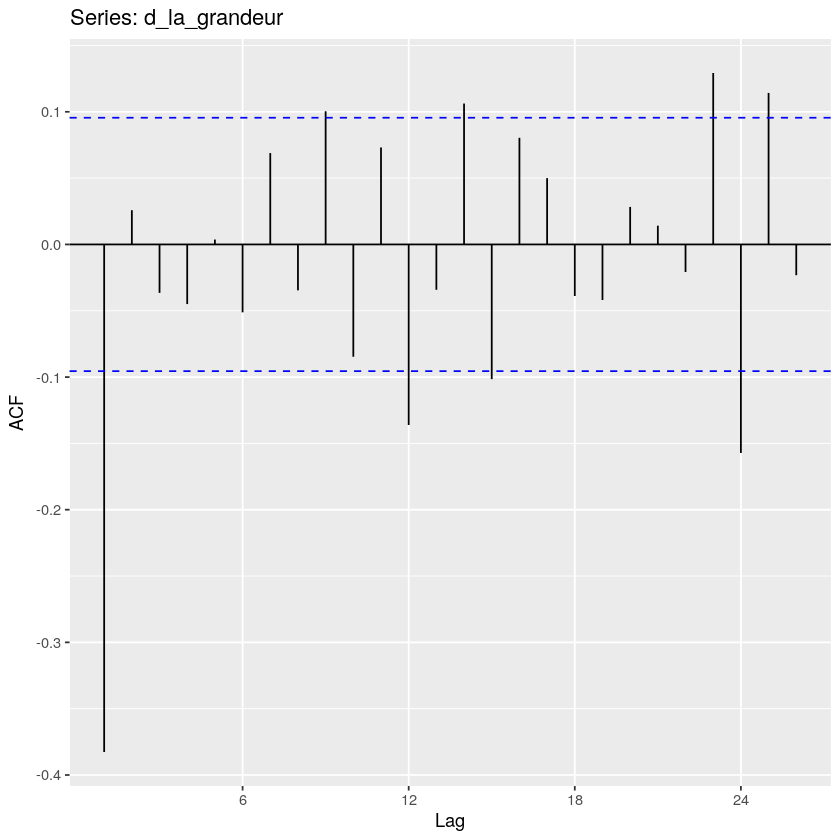

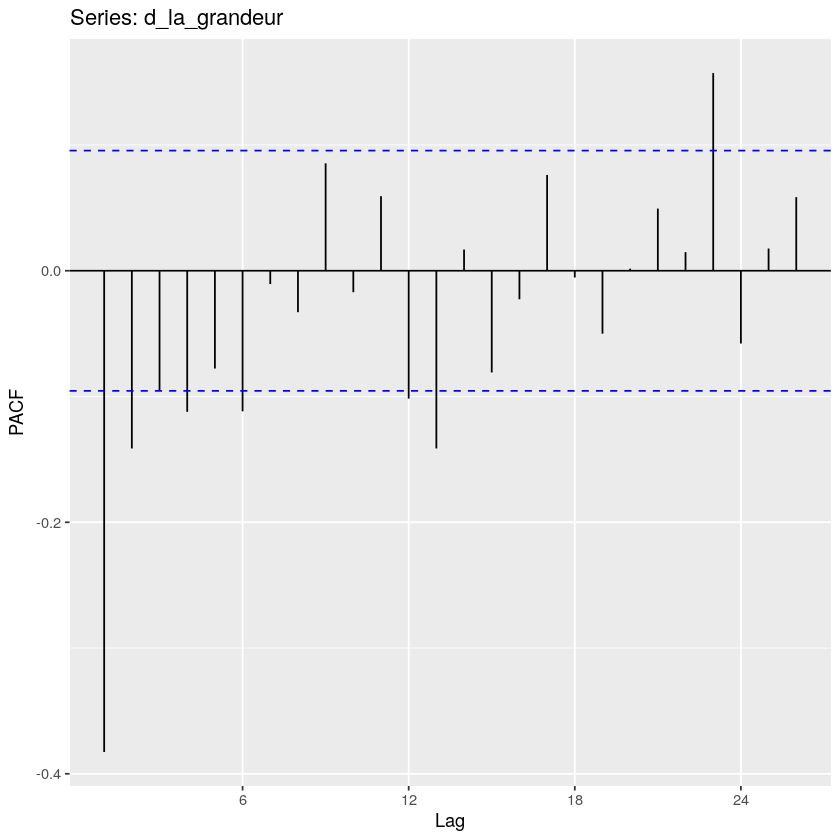

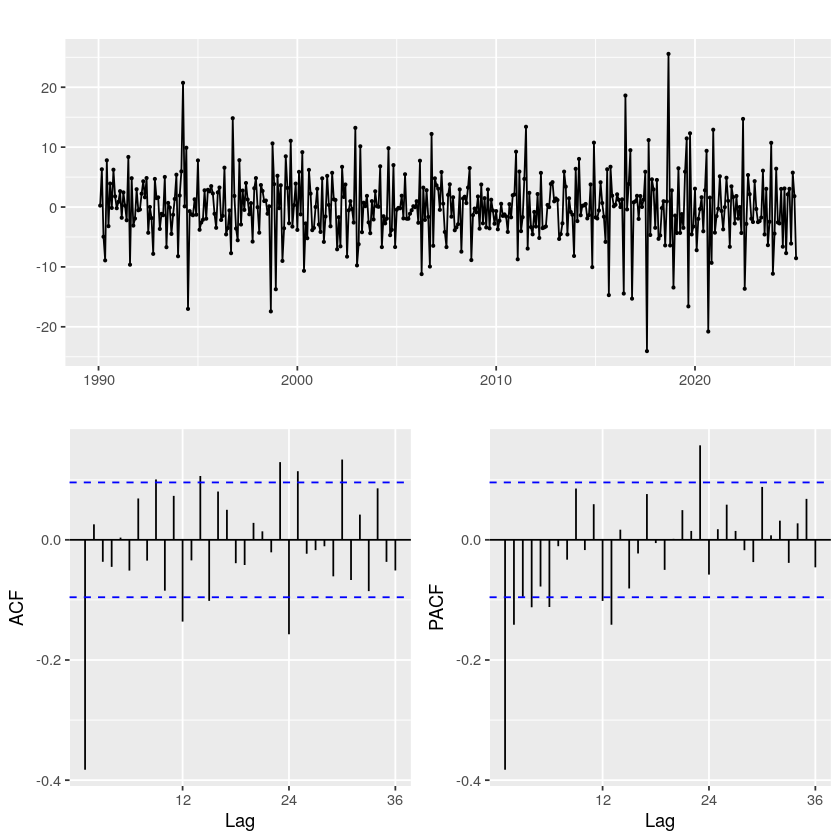

In [43]:
# **************************************************************************#
#                                                                           #
#                                                                           #
#                         PARTIE II : Modèles ARMA                          #
#                                                                           #
#                                                                           #
# **************************************************************************#

# ========================================================================= #
# =============================== Question 4 ============================== #
# ========================================================================= #

# Pour choisir le modèle ARIMA adapté, nous commençons par visualiser les ACF et PACF de la série stationnaire (Figure 3)
par(mfrow=c(1,2))
ggAcf(d_la_grandeur, plot=T)
ggPacf(d_la_grandeur, plot=T)
par(mfrow=c(1,1))
ggtsdisplay(d_la_grandeur)

initial  value 1.730595 
iter   2 value 1.654672
iter   3 value 1.640435
iter   4 value 1.640350
iter   5 value 1.640349
iter   5 value 1.640349
iter   5 value 1.640349
final  value 1.640349 
converged
initial  value 1.640091 
iter   2 value 1.640088
iter   3 value 1.640087
iter   3 value 1.640087
iter   3 value 1.640087
final  value 1.640087 
converged
<><><><><><><><><><><><><><>
 
Coefficients: 
         Estimate     SE t.value p.value
ar1       -0.4387 0.0483 -9.0735  0.0000
ar2       -0.1426 0.0483 -2.9485  0.0034
constant  -0.1013 0.1590 -0.6368  0.5246

sigma^2 estimated as 26.56776 on 418 degrees of freedom 
 
AIC = 6.137054  AICc = 6.137191  BIC = 6.175464 
 


initial  value 1.730595 
iter   2 value 1.680865
iter   3 value 1.638378
iter   4 value 1.636705
iter   5 value 1.636472
iter   6 value 1.636148
iter   7 value 1.634324
iter   8 value 1.633751
iter   9 value 1.632704
iter  10 value 1.631424
iter  11 value 1.629891
iter  12 value 1.629648
iter  13 value 1.629169
iter  14 value 1.629060
iter  15 value 1.627869
iter  16 value 1.627317
iter  17 value 1.627053
iter  18 value 1.626972
iter  19 value 1.626861
iter  20 value 1.626860
iter  21 value 1.626855
iter  22 value 1.626853
iter  23 value 1.626850
iter  24 value 1.626849
iter  24 value 1.626849
iter  24 value 1.626849
final  value 1.626849 
converged
initial  value 1.622908 
iter   2 value 1.622859
iter   3 value 1.622855
iter   4 value 1.622846
iter   5 value 1.622845
iter   6 value 1.622844
iter   7 value 1.622843
iter   8 value 1.622842
iter   9 value 1.622842
iter   9 value 1.622842
iter   9 value 1.622842
final  value 1.622842 
converged
<><><><><><><><><><><><><><>
 
Coefficients:

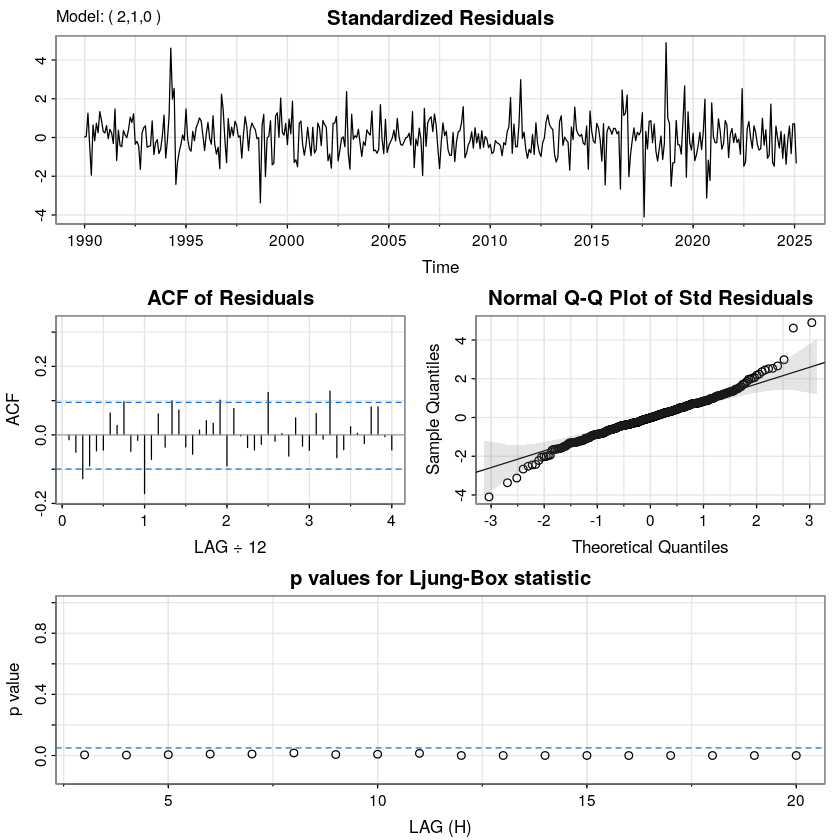

initial  value 1.730938 
iter   2 value 1.651306
iter   3 value 1.651303
iter   4 value 1.651303
iter   5 value 1.651303
iter   5 value 1.651303
iter   5 value 1.651303
final  value 1.651303 
converged
initial  value 1.650308 
iter   2 value 1.650308
iter   2 value 1.650308
iter   2 value 1.650308
final  value 1.650308 
converged
<><><><><><><><><><><><><><>
 
Coefficients: 
         Estimate     SE t.value p.value
ar1       -0.3838 0.0451 -8.5158  0.0000
constant  -0.1013 0.1835 -0.5519  0.5813

sigma^2 estimated as 27.11906 on 419 degrees of freedom 
 
AIC = 6.152744  AICc = 6.152812  BIC = 6.181551 
 


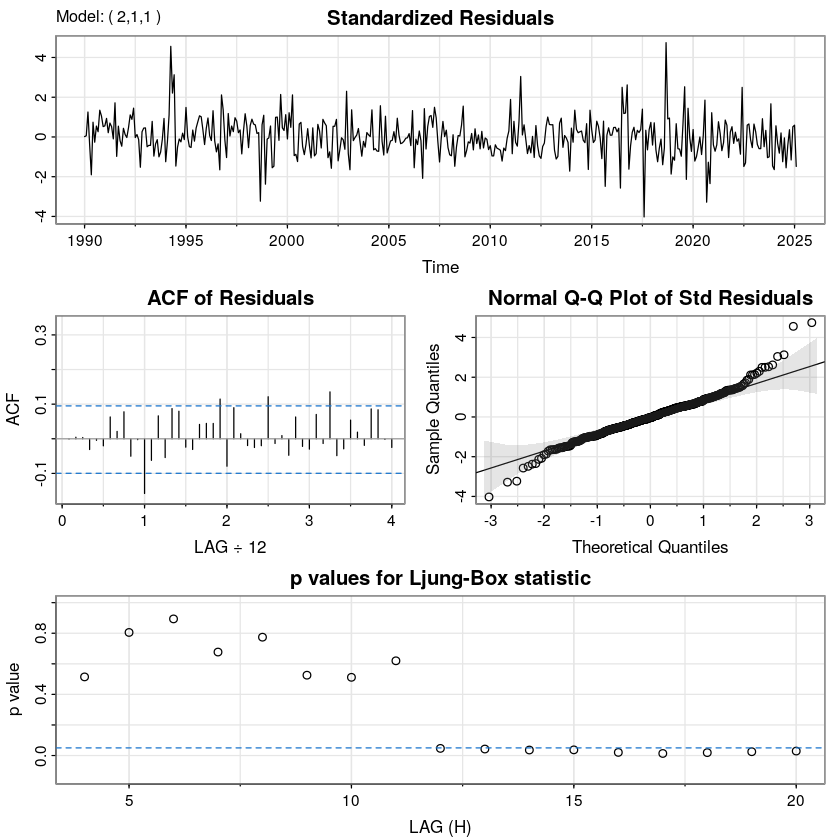

initial  value 1.730938 
iter   2 value 1.678647
iter   3 value 1.639436
iter   4 value 1.638358
iter   5 value 1.631175
iter   6 value 1.629509
iter   7 value 1.628947
iter   8 value 1.628648
iter   9 value 1.628627
iter  10 value 1.628596
iter  11 value 1.628564
iter  12 value 1.628545
iter  13 value 1.628542
iter  14 value 1.628542
iter  14 value 1.628542
iter  14 value 1.628542
final  value 1.628542 
converged
initial  value 1.627765 
iter   2 value 1.627764
iter   3 value 1.627764
iter   4 value 1.627764
iter   5 value 1.627763
iter   6 value 1.627763
iter   6 value 1.627763
iter   6 value 1.627763
final  value 1.627763 
converged
<><><><><><><><><><><><><><>
 
Coefficients: 
         Estimate     SE t.value p.value
ar1        0.1706 0.1100  1.5502  0.1219
ma1       -0.6400 0.0909 -7.0394  0.0000
constant  -0.1004 0.1081 -0.9292  0.3533

sigma^2 estimated as 25.91324 on 418 degrees of freedom 
 
AIC = 6.112406  AICc = 6.112543  BIC = 6.150816 
 


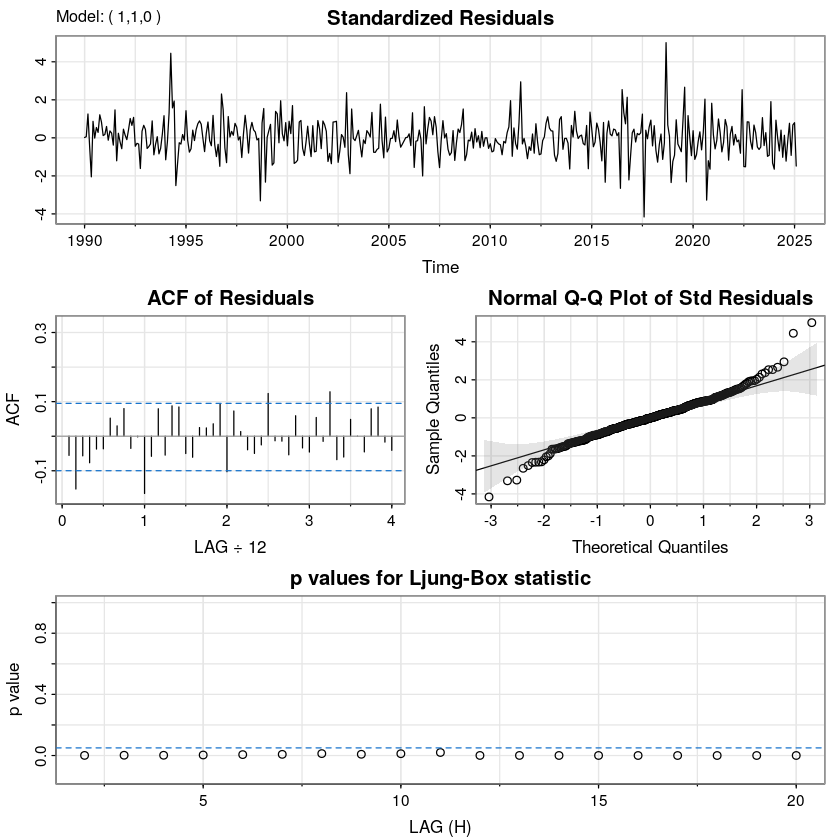

initial  value 1.729754 
iter   2 value 1.636259
iter   3 value 1.630312
iter   4 value 1.629975
iter   5 value 1.629968
iter   5 value 1.629968
iter   5 value 1.629968
final  value 1.629968 
converged
initial  value 1.630264 
iter   2 value 1.630263
iter   2 value 1.630263
iter   2 value 1.630263
final  value 1.630263 
converged
<><><><><><><><><><><><><><>
 
Coefficients: 
         Estimate     SE  t.value p.value
ma1       -0.4979 0.0483 -10.3081  0.0000
constant  -0.1007 0.1252  -0.8048  0.4214

sigma^2 estimated as 26.0456 on 419 degrees of freedom 
 
AIC = 6.112655  AICc = 6.112723  BIC = 6.141462 
 


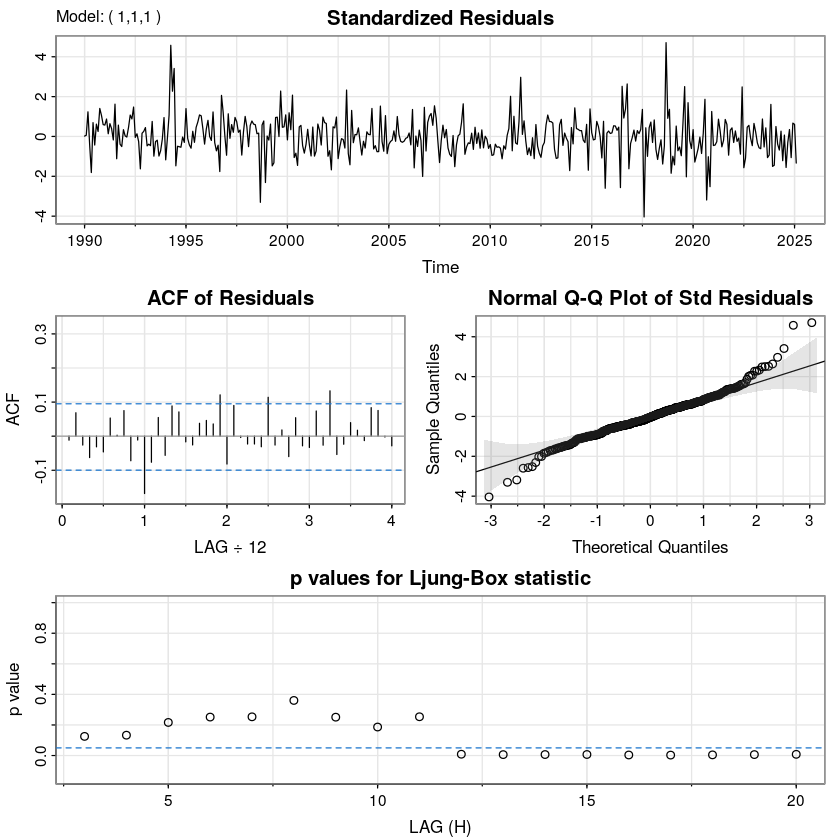

,Estimate,SE,t.value,p.value
ar1,-0.4387,0.0483,-9.0735,0.0000
ar2,-0.1426,0.0483,-2.9485,0.0034
constant,-0.1013,0.1590,-0.6368,0.5246


,Estimate,SE,t.value,p.value
ar1,0.3210,0.0921,3.4834,0.0005
ar2,0.1477,0.0681,2.1683,0.0307
ma1,-0.8037,0.0748,-10.7385,0.0000
constant,-0.0998,0.0919,-1.0868,0.2778


,Estimate,SE,t.value,p.value
ar1,-0.3838,0.0451,-8.5158,0.0000
constant,-0.1013,0.1835,-0.5519,0.5813


,Estimate,SE,t.value,p.value
ar1,0.1706,0.1100,1.5502,0.1219
ma1,-0.6400,0.0909,-7.0394,0.0000
constant,-0.1004,0.1081,-0.9292,0.3533


,Estimate,SE,t.value,p.value
ma1,-0.4979,0.0483,-10.3081,0.0000
constant,-0.1007,0.1252,-0.8048,0.4214


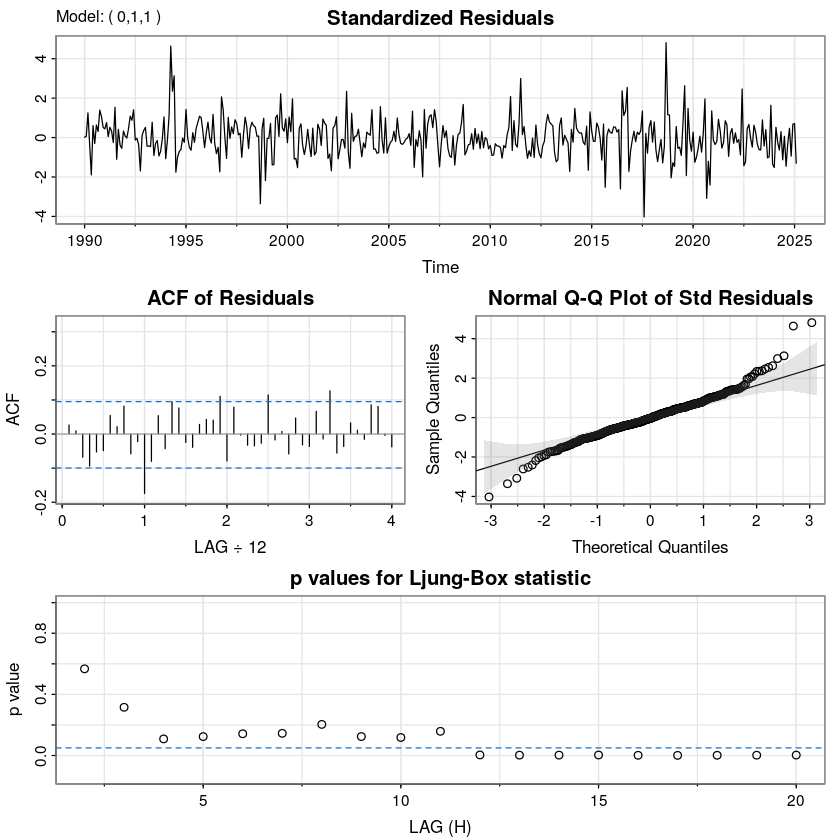

In [44]:
# Les ACF et PACF nous font penser à un AR(2) et un MA(1). 
# On pense toutefois que c'est très peu probable que ce soit un AR ou un MA comme il reste quelques pics de l'ACF ou du PCF qui dépassent le seuil de confiance
#Nous allons tester tous les modèles ARMA tels que p<=2 et q<=1
model1=sarima(la_grandeur, 2, 1, 0)
model2=sarima(la_grandeur, 2, 1, 1)
model3=sarima(la_grandeur, 1, 1, 0)
model4=sarima(la_grandeur, 1, 1, 1)
model5=sarima(la_grandeur, 0, 1, 1)

# Coefficients estimés
model1$ttable
model2$ttable
model3$ttable
model4$ttable
model5$ttable

,lags,statistic,df,p-value
,5,12.55259,3,5.711175e-03
,10,20.55790,8,8.419329e-03
,15,37.85927,13,3.034454e-04
,20,46.56368,18,2.453694e-04
,25,58.79540,23,5.694124e-05
,30,67.63086,28,3.961046e-05


,lags,statistic,df,p-value
,5,0.4334692,2,0.805143613
,10,6.2435332,7,0.511618582
,15,22.0411265,12,0.037061461
,20,29.6223181,17,0.029200992
,25,43.7178134,22,0.003846020
,30,51.1739290,27,0.003321286


,lags,statistic,df,p-value
,5,15.72959,4,3.404326e-03
,10,21.17083,9,1.191311e-02
,15,38.69367,14,4.066574e-04
,20,48.27758,19,2.338705e-04
,25,60.11071,24,6.161806e-05
,30,69.26873,29,3.815185e-05


,lags,statistic,df,p-value
,5,4.453418,3,0.2164831467
,10,11.278031,8,0.1864377491
,15,28.926028,13,0.0067059082
,20,35.667127,18,0.0077817636
,25,50.416031,23,0.0008122805
,30,57.268039,28,0.0008986345


,lags,statistic,df,p-value
,5,7.238525,4,0.1238074706
,10,14.126167,9,0.1179074769
,15,32.496613,14,0.0034030680
,20,40.309095,19,0.0029798175
,25,52.945332,24,0.0005881529
,30,60.278475,29,0.0005702266



	Ljung-Box test

data:  Residuals from ARIMA(2,1,0) with non-zero mean
Q* = 56.13, df = 22, p-value = 8.191e-05

Model df: 2.   Total lags used: 24



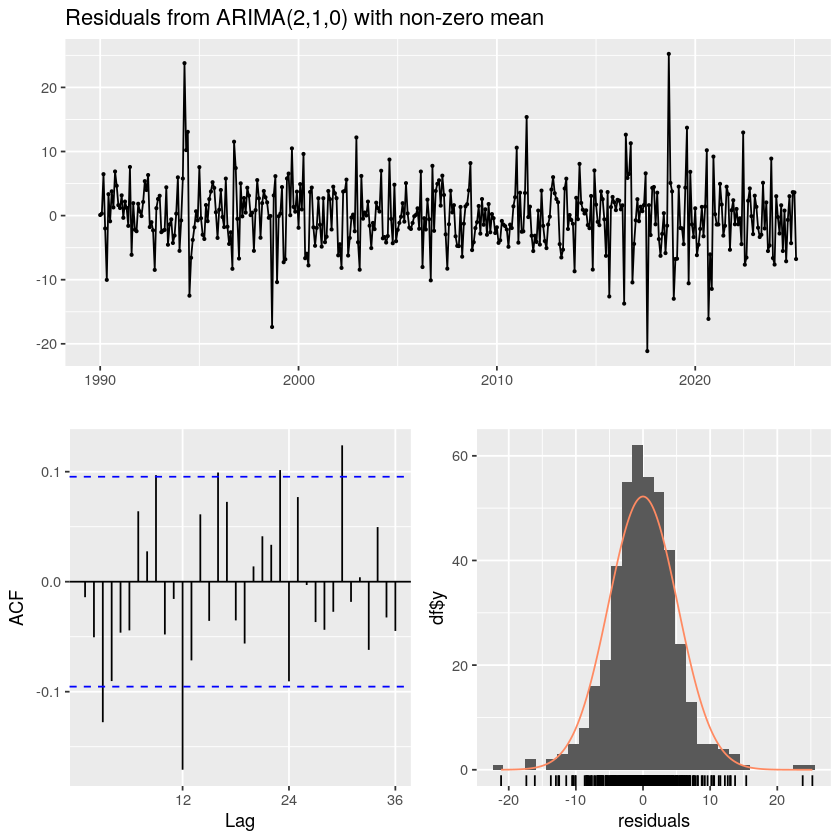


	Ljung-Box test

data:  Residuals from ARIMA(2,1,1) with non-zero mean
Q* = 40.088, df = 21, p-value = 0.007256

Model df: 3.   Total lags used: 24



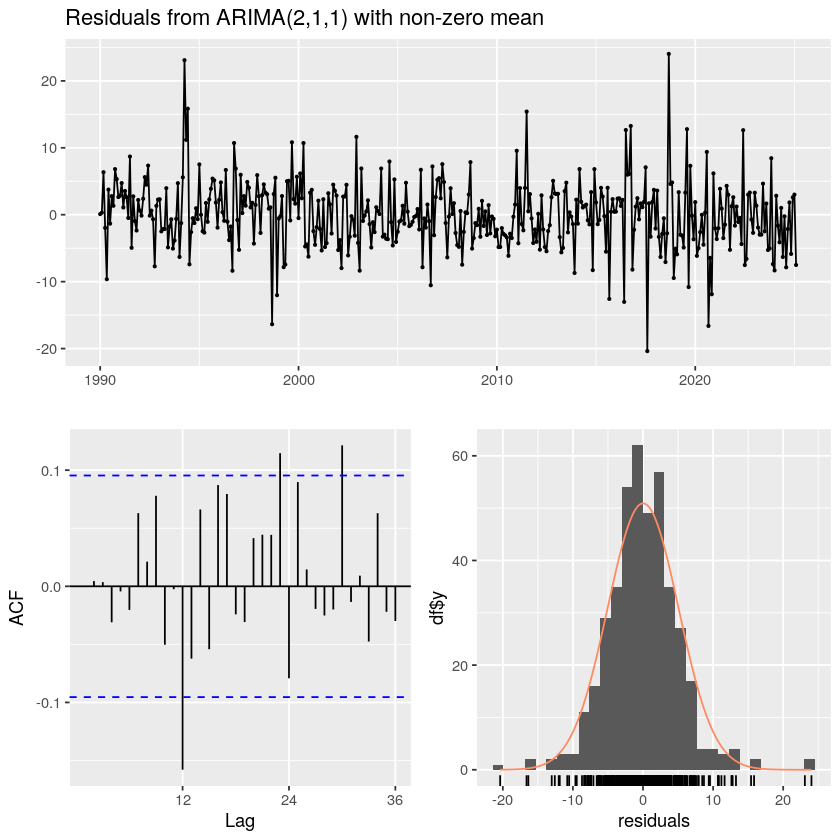


	Ljung-Box test

data:  Residuals from ARIMA(1,1,0) with non-zero mean
Q* = 57.715, df = 23, p-value = 8.117e-05

Model df: 1.   Total lags used: 24



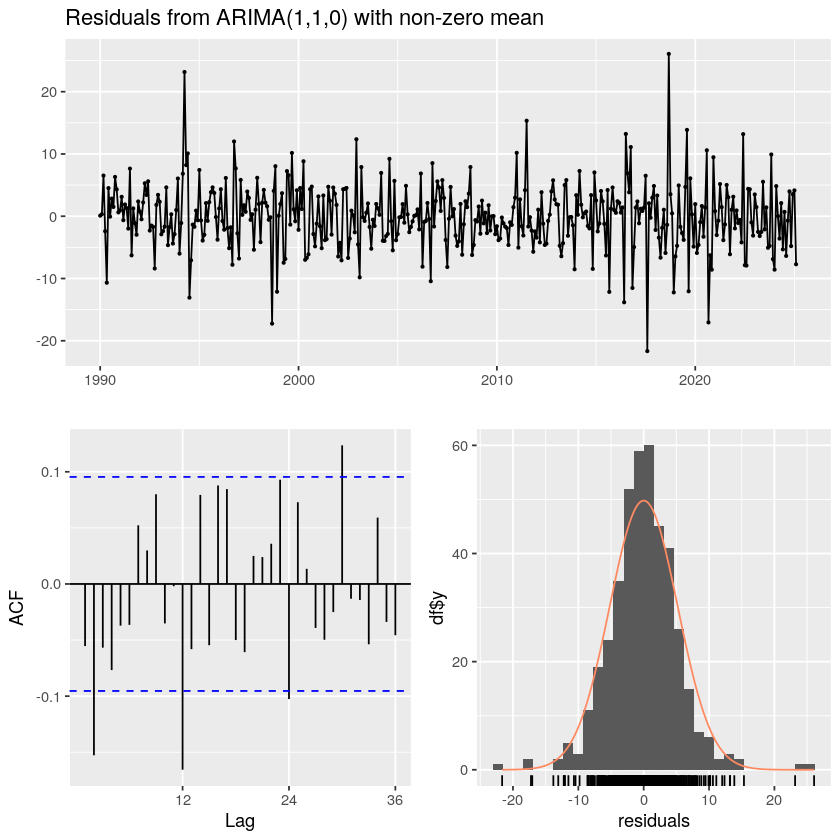


	Ljung-Box test

data:  Residuals from ARIMA(1,1,1) with non-zero mean
Q* = 46.763, df = 22, p-value = 0.001576

Model df: 2.   Total lags used: 24



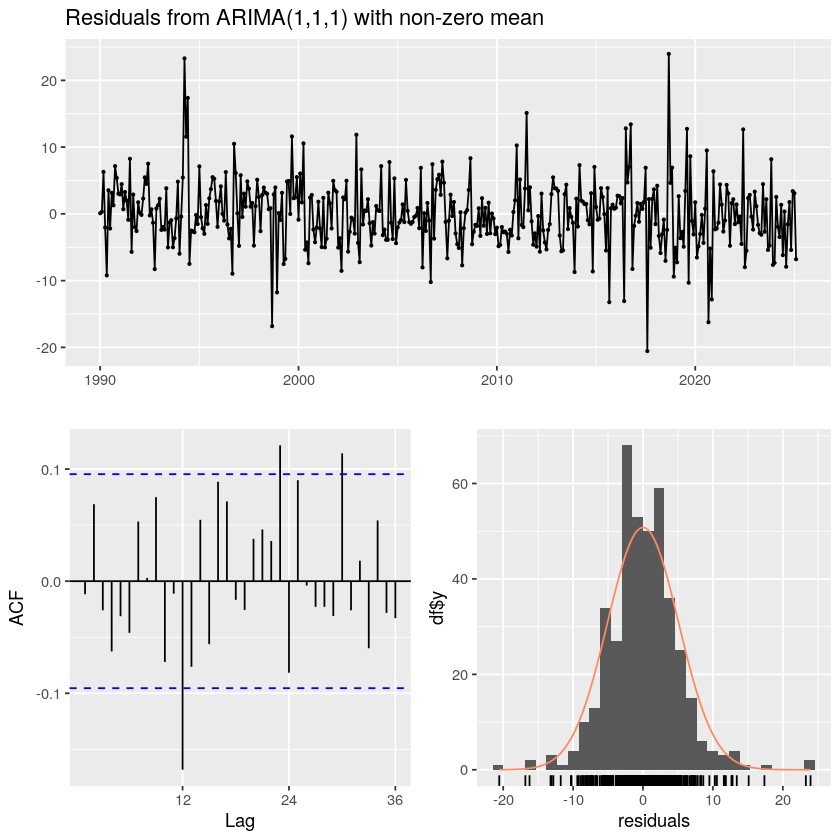


	Ljung-Box test

data:  Residuals from ARIMA(0,1,1) with non-zero mean
Q* = 50.136, df = 23, p-value = 0.0008843

Model df: 1.   Total lags used: 24



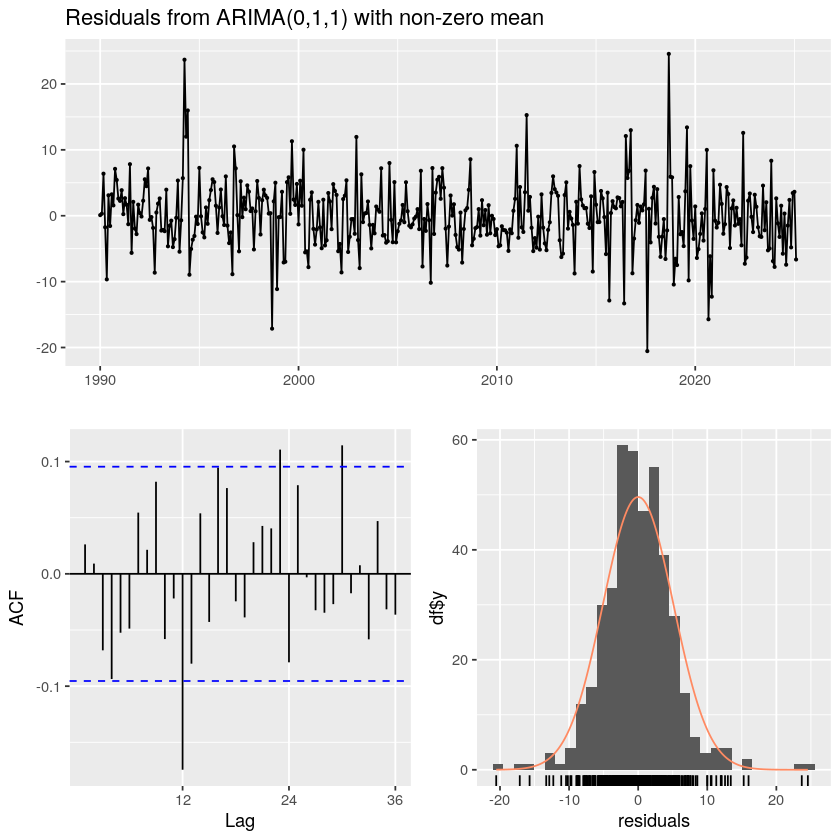

In [45]:
# Les modèles 1, 3 et 5 ont tous leurs coefficients significatifs (sauf la constante): ce sont de bons candidats.

# Test de Ljung-Box (non-autocorrélation des résidus)
LjungBox(model1$fit)
LjungBox(model2$fit)
LjungBox(model3$fit)
LjungBox(model4$fit)
LjungBox(model5$fit)


# Tests joints et visualisation des résidus
checkresiduals(model1$fit)
checkresiduals(model2$fit)
checkresiduals(model3$fit)
checkresiduals(model4$fit)
checkresiduals(model5$fit)

In [ ]:
#Parmi les modèles dont tous les coefficients sont significatifs, le modèle 2 passe le test de Ljung-Box.


# Sélection du meilleur modèle sur la base des critères d'information
# AIC
aic <- AIC(model1$fit, model2$fit, model3$fit, model4$fit)
aic
which.min(aic$AIC)
## Le modèle ARIMA(2,0,1) présente les meilleurs résultats pour le critère AIC.

# BIC
bic <- BIC(model1$fit, model2$fit, model3$fit, model4$fit)
bic
which.min(bic$BIC)
## Le modèle ARIMA(1,0,1) présente les meilleurs résultats pour le critère BIC. Mais les résultats du modèle ARIMA(2,0,1) sont très proches.

##On fait donc le choix du modèle ARIMA(2,0,1)

#On vérifie notre choix grâce à une fonction qui détermine automatiquement le meilleur ARMA
best_arma <- auto.arima(d_la_grandeur, stationary = TRUE, d = 0, 
                        max.p = 13, max.q = 13, 
                        ic = "aic", stepwise = FALSE, approximation = FALSE,seasonal = FALSE)
summary(best_arma)

##Cela donne bien ARIMA(2,0,1)

In [ ]:
# ========================================================================= #
# =============================== Question 5 ============================== #
# ========================================================================= #


# Amélioration du modèle final en prenant en compte les valeurs aberrantes (outliers)
arima111=arima(la_grandeur, order=c(2,1,1))
res=locate.outliers.oloop(la_grandeur, arima111, cval = 5, types = c("AO", "LS", "TC","IO"), delta = 0.7)
res$outliers
model_out <- discard.outliers(res, la_grandeur, method = "en-masse", tsmethod.call = arima111$call, cval=5)
model_out$outliers
final_model <- model_out$fit

# Coefficients du modèle ARIMA final
coefficients(final_model) 

# ph1 = 0.046, phi2 = 0.043 : les coefficients AR(2) sont petits, donc la dépendance temporelle est modérée. 
# psi1 = -0.587 : le  coefficient MA(1) est plus important en valeur absolue, il capture une partie significative du bruit blanc dépendant.

# Globalement, ces coefficients suggèrent une dépendance modérée, surtout du côté MA (moyenne mobile).

In [ ]:
# **************************************************************************#
#                                                                           #
#                                                                           #
#                         PARTIE III : Prévision                            #
#                                                                           #
#                                                                           #
# **************************************************************************#

# ========================================================================= #
# =========================== Questions 6 & 7 ============================= #
# ========================================================================= #

# L'équation vérifiée par l'intervalle de confiance est présentée dans le document (à faire)
# Les hypothèses pour obtenir cet intervalle sont données dans le document (à faire)

In [ ]:
# ========================================================================= #
# =============================== Question 8 ============================== #
# ========================================================================= #

## Intervalle de confiance bivarié
# On construit la matrice sigma avec les écarts-types et le coefficient de corrélation
sigma_g1 <- sqrt(final_model$sigma2)
sigma_g2 <- sqrt(final_model$sigma2*(1+(1 + final_model$coef[1] - final_model$coef[2])^2))
rho <- final_model$sigma2*(1 + final_model$coef[1] - final_model$coef[2])
Sigma <- rbind(c(sigma_g1^2, rho), 
               c(rho, sigma_g2^2))
Sigma

# On définit les valeurs propres et vecteurs propres de la matrice considérée
eigen(Sigma)
eigen(Sigma)$values
eigen(Sigma)$vectors
# Le grand axe de l'ellipse est dirigé par le vecteur propre de Sigma associé à la plus grande valeur propre. 
# On affiche graphiquement l'ellipse
Pred <- predict(final_model,n.ahead = 2, newxreg = matrix(c(0,0),nrow = 1, ncol = 2, byrow = TRUE), se.fit = TRUE)

ell <- ellipse(Sigma,centre=Pred$pred,level=0.95,
               npoints =10000)
plot(ell,xlab="Prévision Mars 2025 (T+1)", ylab="Prévision Avril 2025 (T+2)")
points(x=Pred$pred[1],y=Pred$pred[2],type="p",lwd=7, pch = 23)

# Prévisions pour les deux périodes suivantes en prenant en compte les effets des valeurs aberrantes
par(mfrow =c(1 ,1))
prev_T2 <- sarima.for(la_grandeur,n.ahead=2, p=2,d=1,q=1,xreg = model_out$xreg, newxreg =  matrix(c(0,0),nrow = 1, ncol = 2, byrow = TRUE)) # Visualisation graphique
prev_T2